In [290]:
from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
import itertools

In [291]:
plt.rcParams.update({'font.size': 11})

In [292]:
marker = itertools.cycle(('D', 'v', '^', '<', '>','8','s','p','P','*')) 

In [293]:
qwoa_base='../output/CLUSTER/qwoa_evolution/csv'

In [294]:
qwoa_files = ['1_qwoa_evolution.csv',
 '2_qwoa_evolution.csv',
 '4_qwoa_evolution.csv',
 '6_qwoa_evolution.csv',
 '8_qwoa_evolution.csv',
'10_qwoa_evolution.csv',
 '12_qwoa_evolution.csv',
 '14_qwoa_evolution.csv',
'15_qwoa_evolution.csv']

In [295]:
qwoa_data = []
for path in qwoa_files:
    qwoa_data.append(pd.read_csv("{}/{}".format(qwoa_base,path)))

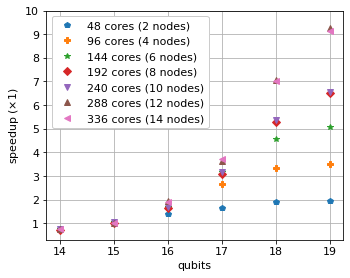

In [297]:
s=12
l = 30
plt.figure(figsize = (5,4))

#plt.figure(figsize = (4,3.2))

for i, data in enumerate(qwoa_data[0:-1]):
    if i != 0:
        plt.plot(data['qubits'][s:],qwoa_data[0]['time'][s:]/data['time'][s:],"*", label = "{} cores ({} nodes)".format(data['comm_size'][0],np.int(data['comm_size'][0]/24)),marker = next(marker), markersize=6)
plt.xlabel('qubits')
plt.ylabel(r'speedup $(\times 1)$')
plt.grid(which='major')
plt.xticks(qwoa_data[0]['qubits'][s:].values)
plt.yticks([i for i in range(1,11)])
plt.legend(framealpha=1)
plt.tight_layout()
plt.savefig('qwoa_state_evolution', dpi = 200)

9
    Unnamed: 0  comm_size  qubits  system_size  norm        time  peak_memory
0           18         24       2            4   1.0    0.685492     0.916275
1           19         24       3            8   1.0    1.223305     0.963196
2           20         24       4           16   1.0    1.251088     0.971684
3           21         24       5           32   1.0    1.286297     1.003159
4           22         24       6           64   1.0    1.809232     1.085899
5           23         24       7          128   1.0    1.830212     1.088001
6           24         24       8          256   1.0    2.367309     1.248344
7           25         24       9          512   1.0    2.420208     1.250904
8           26         24      10         1024   1.0    2.485394     1.252766
9           27         24      11         2048   1.0    2.660284     1.256054
10          28         24      12         4096   1.0    3.269972     1.382141
11          29         24      13         8192   1.0    3.5623

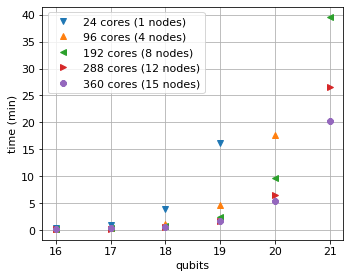

In [281]:
s=14
l = 30
plt.figure(figsize = (5,4))
print(len(qwoa_data))
print(qwoa_data[0])
#plt.figure(figsize = (4,3.2))
for i in [0,2,4,6,8]:
#i = 0
    plt.plot(qwoa_data[i]['qubits'][s:],qwoa_data[i]['time'][s:]/60,"*", label = "{} cores ({} nodes)".format(int(qwoa_data[i]['comm_size'][0]), int(qwoa_data[i]['comm_size'][0]/24)),marker = next(marker), markersize=6)

plt.xlabel('qubits')
plt.ylabel(r'time (min)')
plt.grid(which='major')
plt.xticks([i for i in range(16,22)])
#plt.yticks([i for i in range(1,11)])
plt.legend(framealpha=0.8)
plt.tight_layout()
plt.savefig('qwoa_state_evolution_time', dpi = 200)

8
    comm_size  qubits  system_size  norm         time  peak_memory
0          24       2            4   1.0     0.677780     0.893894
1          24       3            8   1.0     1.203595     0.940910
2          24       4           16   1.0     1.732337     1.030838
3          24       5           32   1.0     2.279901     1.378494
4          24       6           64   1.0     2.296213     1.381603
5          24       7          128   1.0     2.314004     1.386028
6          24       8          256   1.0     2.334863     1.389362
7          24       9          512   1.0     2.359006     1.393532
8          24      10         1024   1.0     2.388689     1.395058
9          24      11         2048   1.0     2.430654     1.397961
10         24      12         4096   1.0     2.497168     1.409851
11         24      13         8192   1.0     2.622362     1.422489
12         24      14        16384   1.0     2.869941     1.490883
13         24      15        32768   1.0     3.371400     1.

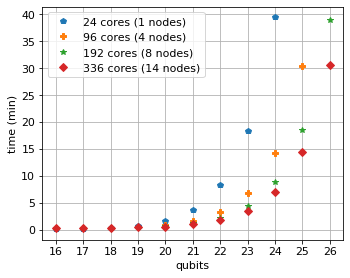

In [280]:
s=14
l = 30
plt.figure(figsize = (5,4))
print(len(qaoa_data))
print(qaoa_data[0])
#plt.figure(figsize = (4,3.2))
for i in [0,2,4,7]:
#i = 0
    plt.plot(qaoa_data[i]['qubits'][s:],qaoa_data[i]['time'][s:]/60,"*", label = "{} cores ({} nodes)".format(int(qaoa_data[i]['comm_size'][0]), int(qaoa_data[i]['comm_size'][0]/24)),marker = next(marker), markersize=6)

plt.xlabel('qubits')
plt.ylabel(r'time (min)')
plt.grid(which='major')
plt.xticks([i for i in range(16,27)])
#plt.yticks([i for i in range(1,11)])
plt.legend(framealpha=0.8)
plt.tight_layout()
plt.savefig('qaoa_state_evolution_time', dpi = 200)

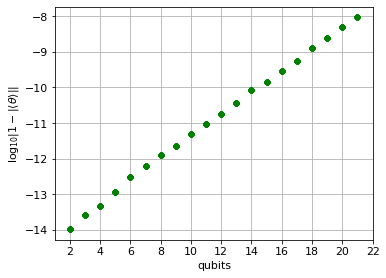

In [284]:
s=0
l = 30
plt.figure(figsize = (5.5,4))

#plt.figure(figsize = (4,3.2))

for i, data in enumerate(qwoa_data[0:]):
    if i != 0:
        plt.plot(data['qubits'][s:],np.log10(np.abs(1-data['norm'][s:])),".", label = "{} cores ({} nodes)".format(data['comm_size'][0],np.int(data['comm_size'][0]/24)),markersize=10, color = 'green')
plt.xlabel('qubits')
plt.ylabel(r'$\log_{10}\left|1-|\langle \theta \rangle|\right|$')
plt.grid(which='major')
plt.xticks([i for i in range(2,24,2)])
#plt.yticks([i for i in range(1,11)])
#plt.legend(framealpha=1)
plt.tight_layout()
plt.savefig('qwoa_state_evolution_norm', dpi = 200)

In [90]:
qwoa_data[0]['norm'][s:]

12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
Name: norm, dtype: float64

In [286]:
qaoa_base='../output/CLUSTER/qaoa_evolution/csv'

In [287]:
qaoa_files = [
 '1_qaoa_evolution.csv',
 '2_qaoa_evolution.csv',
 '4_qaoa_evolution.csv',
 '6_qaoa_evolution.csv',
 '8_qaoa_evolution.csv',
 '10_qaoa_evolution.csv',
 '12_qaoa_evolution.csv',
 '14_qaoa_evolution.csv']

In [288]:
qaoa_data = []
for path in qaoa_files:
    qaoa_data.append(pd.read_csv("{}/{}".format(qaoa_base,path)))

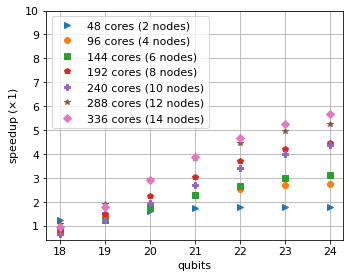

In [298]:
s=16
l = 30
plt.figure(figsize = (5,4))

#plt.figure(figsize = (5,4.6))

for i, data in enumerate(qaoa_data[0:]):
    if i != 0:
        plt.plot(data['qubits'][s:],qaoa_data[0]['time'][s:]/data['time'][s:],"*", label = "{} cores ({} nodes)".format(data['comm_size'][0],np.int(data['comm_size'][0]/24)),marker = next(marker), markersize=6)

plt.xlabel('qubits')
plt.ylabel(r'speedup $(\times 1)$')
plt.grid(which='major')
plt.xticks(qaoa_data[0]['qubits'][s:].values)
plt.yticks([i for i in range(1,11)])
plt.legend(framealpha=0.8)
plt.tight_layout()
plt.savefig('qaoa_state_evolution', dpi = 200)

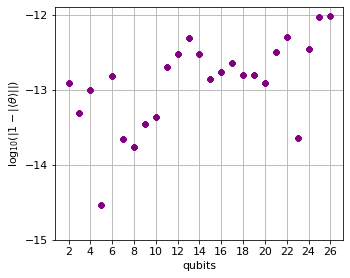

In [283]:
s=0
l = 30
plt.figure(figsize = (5,4))

#plt.figure(figsize = (5,4.6))

for i, data in enumerate(qaoa_data[0:]):
    if i != 0:
        plt.plot(data['qubits'][s:],np.log10(np.abs(1-data['norm'][s:])),".", label = "{} cores ({} nodes)".format(data['comm_size'][0],np.int(data['comm_size'][0]/24)),markersize=10, color = 'purple')

plt.xlabel('qubits')
plt.ylabel(r'$\log_{10}(|1-|\langle \theta \rangle||)$')
plt.grid(which='major')
plt.xticks([i for i in range(2,28,2)])
plt.yticks([i for i in range(-15,-11,1)])
#plt.legend(framealpha=1)
plt.tight_layout()
plt.savefig('qaoa_state_evolution_norm', dpi = 200)

In [59]:
base = '../output/WORKSTATION/qwoa_evolution/csv/'
files = [
'1_qwoa_evolution.csv',
'2_qwoa_evolution.csv',
'4_qwoa_evolution.csv',
'8_qwoa_evolution.csv',
'16_qwoa_evolution.csv'
]
qwoa_one_node_dfs = []
for file in files:
    qwoa_one_node_dfs.append(pd.read_csv(base+file))

In [60]:
! ls ../output/WORKSTATION/qwoa_evolution/csv/

16_qwoa_evolution.csv  2_qwoa_evolution.csv  8_qwoa_evolution.csv
1_qwoa_evolution.csv   4_qwoa_evolution.csv  quisa_1_qwoa_evolution.csv


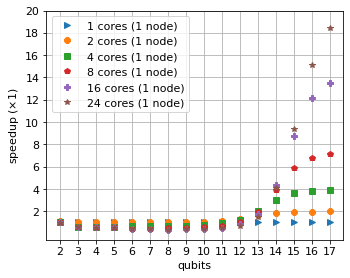

In [278]:
plt.figure(figsize = (5,4))

l = len(qwoa_one_node_dfs[0]["qubits"])
for data_df in qwoa_one_node_dfs:
    plt.plot(data_df["qubits"][:l], qwoa_one_node_dfs[0]["time"]/data_df["time"][:l], '*',marker = next(marker), markersize=6,label = "{} cores ({} node)".format(data_df['comm_size'][0],np.int(data_df['comm_size'][0]/24 + 1)))

plt.plot(qwoa_data[0]['qubits'][:l],qwoa_one_node_dfs[0]["time"]/qwoa_data[0]['time'][:l],"*", label = "{} cores ({} node)".format(qwoa_data[0]['comm_size'][0],np.int(qwoa_data[0]['comm_size'][0]/24)),marker = next(marker), markersize=6)
    
plt.xlabel('qubits')
plt.ylabel(r'speedup $(\times 1)$')
plt.grid(which='major')
plt.xticks(qwoa_one_node_dfs[0]['qubits'][:l].values)
plt.yticks([i for i in range(2,22,2)])
plt.legend(framealpha=0.8)
plt.tight_layout()
plt.savefig('qwoa_state_evolution_one_node', dpi = 200)

In [67]:
base = '../output/WORKSTATION/qaoa_evolution/csv/'
files = [
'1_qaoa_evolution.csv',
'2_qaoa_evolution.csv',
'4_qaoa_evolution.csv',
'8_qaoa_evolution.csv',
'16_qaoa_evolution.csv'
]
qaoa_one_node_dfs = []
for file in files:
    qaoa_one_node_dfs.append(pd.read_csv(base+file))

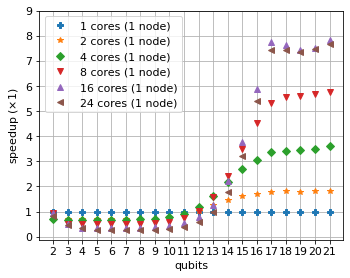

In [277]:
plt.figure(figsize = (5,4))

l = len(qaoa_one_node_dfs[0]["qubits"])
for data_df in qaoa_one_node_dfs:
    plt.plot(data_df["qubits"][:l], qaoa_one_node_dfs[0]["time"]/data_df["time"][:l], '*',marker = next(marker), markersize=6,label = "{} cores ({} node)".format(data_df['comm_size'][0],np.int(data_df['comm_size'][0]/24 + 1)))

plt.plot(qaoa_data[0]['qubits'][:l],qaoa_one_node_dfs[0]["time"]/qaoa_data[0]['time'][:l],"*", label = "{} cores ({} node)".format(qaoa_data[0]['comm_size'][0],np.int(qaoa_data[0]['comm_size'][0]/24)),marker = next(marker), markersize=6)
    
plt.xlabel('qubits')
plt.ylabel(r'speedup $(\times 1)$')
plt.grid(which='major')
plt.xticks(qaoa_one_node_dfs[0]['qubits'][:l].values)
plt.yticks([i for i in range(0,10)])
plt.legend(framealpha=0.8)
plt.tight_layout()
plt.savefig('qaoa_state_evolution_one_node', dpi = 200)

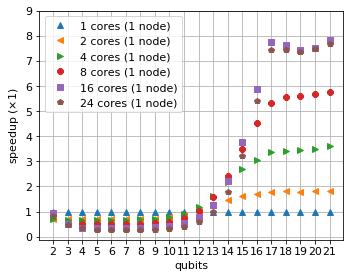

In [276]:
plt.figure(figsize = (5,4))

l = len(qaoa_one_node_dfs[0]["qubits"])
for data_df in qaoa_one_node_dfs:
    plt.plot(data_df["qubits"][:l], qaoa_one_node_dfs[0]["time"]/data_df["time"][:l], '*',marker = next(marker), markersize=6,label = "{} cores ({} node)".format(data_df['comm_size'][0],np.int(data_df['comm_size'][0]/24 + 1)))

plt.plot(qaoa_data[0]['qubits'][:l],qaoa_one_node_dfs[0]["time"]/qaoa_data[0]['time'][:l],"*", label = "{} cores ({} node)".format(qaoa_data[0]['comm_size'][0],np.int(qaoa_data[0]['comm_size'][0]/24)),marker = next(marker), markersize=6)
    
plt.xlabel('qubits')
plt.ylabel(r'speedup $(\times 1)$')
plt.grid(which='major')
plt.xticks(qaoa_one_node_dfs[0]['qubits'][:l].values)
plt.yticks([i for i in range(0,10)])
plt.legend(framealpha=0.8)
plt.tight_layout()
plt.savefig('qaoa_state_evolution_norm', dpi = 200)

In [69]:
files = [
'../output/CLUSTER/qwoa_execute_global/1_qwoa_execute_bench_log.csv',
'../output/CLUSTER/qwoa_execute_global/2_qwoa_execute_bench_log.csv',
'../output/CLUSTER/qwoa_execute_global/8_qwoa_execute_bench_log.csv',
]
qwoa_execute_global_dfs = []
for file in files:
    qwoa_execute_global_dfs.append(pd.read_csv(file))

In [18]:
qwoa_execute_global_dfs[2].head()

,Unnamed: 0,comm_size,qubits,system_size,depth,time
0,16,192,18,262144,1,180.426815
1,19,192,18,262144,2,360.264820
2,21,192,18,262144,3,541.057251
3,23,192,18,262144,4,724.078361
4,26,192,18,262144,5,909.777892


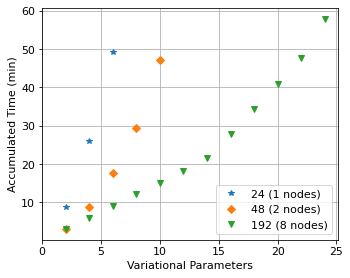

In [275]:
plt.figure(figsize = (5,4))

for i, data_df in enumerate(qwoa_execute_global_dfs):
    plt.plot(data_df["depth"]*2, data_df["time"]/60, '*',marker = next(marker), markersize=6,label = "{} ({} nodes)".format(data_df['comm_size'][0],np.int(data_df['comm_size'][0]/24)))
    
plt.xlabel('Variational Parameters')
plt.ylabel('Accumulated Time (min)')
plt.grid(which='major')
plt.xticks([i for i in range(0,26,5)])
#plt.yticks([i for i in range(0,10)])
plt.legend(framealpha=0.8)
plt.tight_layout()
plt.savefig('qwoa_parallel_optimisation_global', dpi = 200)

<Figure size 432x288 with 0 Axes>

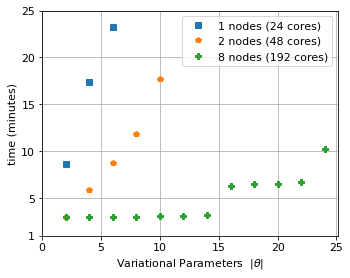

In [274]:
plt.clf()

plt.figure(figsize = (5,4))

for i, data_df in enumerate(qwoa_execute_global_dfs):
    times = np.append(data_df['time'][0:1].values,data_df['time'][1:].values - data_df['time'][:-1].values)
    plt.plot(data_df["depth"]*2, times/60, '*',marker = next(marker), markersize=6,label = "{} nodes ({} cores)".format(np.int(data_df['comm_size'][0]/24),int(data_df['comm_size'][0])))

#plt.plot(qwoa_execute_global_dfs[0]['depth'][:l],qwoa_execute_global_dfs[0]["time"],"*", label = "{} cores ({} node)".format(qwoa_execute_global_dfs[0]['comm_size'][0],np.int(qwoa_execute_global_dfs[0]['comm_size'][0]/24)),marker = next(marker), markersize=6)
    
plt.xlabel(r'Variational Parameters  $|\theta|$')
plt.ylabel('time (minutes)')
plt.grid(which='major')
plt.xticks([i for i in range(0,26,5)])
plt.yticks([1, 5, 10, 15, 20, 25])
plt.legend(framealpha=0.8)
plt.tight_layout()
#plt.show()
plt.savefig('qwoa_parallel_optimisation_global_time', dpi = 200)
#plt.clf()

In [71]:
files = [
'../output/CLUSTER/qwoa_execute/1_qwoa_execute_bench_log.csv',
'../output/CLUSTER/qwoa_execute/2_qwoa_execute_bench_log.csv',
'../output/CLUSTER/qwoa_execute/4_qwoa_execute_bench_log.csv',
'../output/CLUSTER/qwoa_execute/8_qwoa_execute_bench_log.csv',
'../output/CLUSTER/qwoa_execute/16_qwoa_execute_bench_log.csv'
]
qwoa_execute_dfs = []
for file in files:
    qwoa_execute_dfs.append(pd.read_csv(file))

In [72]:
qwoa_execute_dfs

[    comm_size  qubits  system_size  depth         time
 0          24      16        65536      1    30.593893
 1          24      16        65536      2    90.358833
 2          24      16        65536      3   171.159061
 3          24      16        65536      4   293.787804
 4          24      16        65536      5   420.455681
 5          24      16        65536      6   669.942435
 6          24      16        65536      7   932.367440
 7          24      16        65536      8  1203.668710
 8          24      16        65536      9  1480.273233
 9          24      16        65536     10  1777.718433
 10         24      16        65536     11  2080.205589
 11         24      16        65536     12  2445.008811
 12         24      16        65536     13  2825.569481
 13         24      16        65536     14  3300.572971,
     comm_size  qubits  system_size  depth         time
 0          48      16        65536      1    10.941669
 1          48      16        65536      2    3

In [77]:
plt.clf()

plt.figure(figsize = (5,4))

for i, data_df in enumerate(qwoa_execute_dfs):
    plt.plot(data_df["depth"]*2, data_df["time"]/60, '*',marker = next(marker), markersize=6,label = "{} nodes ({} cores)".format(np.int(data_df['comm_size'][0]/24),int(data_df['comm_size'][0])))

#plt.plot(qwoa_execute_global_dfs[0]['depth'][:l],qwoa_execute_global_dfs[0]["time"],"*", label = "{} cores ({} node)".format(qwoa_execute_global_dfs[0]['comm_size'][0],np.int(qwoa_execute_global_dfs[0]['comm_size'][0]/24)),marker = next(marker), markersize=6)
    
plt.xlabel(r'Variational Parameters  $|\theta|$')
plt.ylabel('Accumulated Time (min)')
plt.grid(which='major')
plt.xticks([i for i in range(0,86,5)])
#plt.yticks([i for i in range(0,10)])
plt.legend(framealpha=1)
plt.tight_layout()
plt.savefig('qwoa_parallel_optimisation_local', dpi = 200)
plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

In [78]:
files = [
'../output/CLUSTER/qwoa_execute/1_qwoa_execute_quop_log.csv',
'../output/CLUSTER/qwoa_execute/2_qwoa_execute_quop_log.csv',
'../output/CLUSTER/qwoa_execute/4_qwoa_execute_quop_log.csv',
'../output/CLUSTER/qwoa_execute/8_qwoa_execute_quop_log.csv',
'../output/CLUSTER/qwoa_execute/16_qwoa_execute_quop_log.csv'
]
qwoa_execute_quop_dfs = []
for file in files:
    qwoa_execute_quop_dfs.append(pd.read_csv(file))

In [79]:
qwoa_execute_quop_dfs[0].head()

,label,system_size,ansatz_depth,repeat,state_norm,simulation_time,MPI_nodes,fun,nfev,success
0,qwoa parallel jacobian (local),65536,1,1,1.0,0.312443,24,0.228290,72,False
1,qwoa parallel jacobian (local),65536,2,1,1.0,11.518746,24,0.139261,76,False
2,qwoa parallel jacobian (local),65536,3,1,1.0,21.636452,24,0.098049,79,False
3,qwoa parallel jacobian (local),65536,4,1,1.0,42.491436,24,0.074720,112,False
4,qwoa parallel jacobian (local),65536,5,1,1.0,46.532373,24,0.060006,153,False


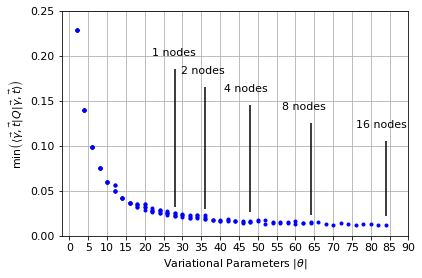

In [177]:
for i, data_df in enumerate(qwoa_execute_quop_dfs):
    plt.plot(data_df["ansatz_depth"]*2, data_df["fun"], '.',color = 'blue')
    plt.vlines(np.max(data_df["ansatz_depth"])*2, np.min(data_df["fun"])+0.01, 0.185 - i*0.02, color = 'black')
    plt.annotate(str(int(data_df["MPI_nodes"][0]/24)) + " nodes", xy=(np.max(data_df["ansatz_depth"]*2-6-i*0.5), 0.20- i*0.02))
    #plt.plot(qwoa_execute_global_dfs[0]['depth'][:l],qwoa_execute_global_dfs[0]["time"],"*", label = "{} cores ({} node)".format(qwoa_execute_global_dfs[0]['comm_size'][0],np.int(qwoa_execute_global_dfs[0]['comm_size'][0]/24)),marker = next(marker), markersize=6)
    
plt.xlabel(r'Variational Parameters $|\theta|$')
plt.ylabel(r'$\min \left(\langle \vec{\gamma},\vec{t} |Q | \vec{\gamma}, \vec{t} \rangle \right)$')
plt.grid(which='major')
plt.xticks([i for i in range(0,91,5)])
plt.yticks([i*0.05 for i in range(0,6)])
plt.tight_layout()
plt.savefig('qwoa_optimised_values', dpi = 200)


<Figure size 432x288 with 0 Axes>

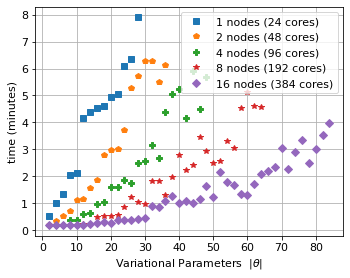

In [282]:
plt.clf()

plt.figure(figsize = (5,4))

for i, data_df in enumerate(qwoa_execute_dfs):
    times = np.append(data_df['time'][0:1].values,data_df['time'][1:].values - data_df['time'][:-1].values)
    plt.plot(data_df["depth"]*2, times/60, '*',marker = next(marker), markersize=6,label = "{} nodes ({} cores)".format(np.int(data_df['comm_size'][0]/24),int(data_df['comm_size'][0])))

#plt.plot(qwoa_execute_global_dfs[0]['depth'][:l],qwoa_execute_global_dfs[0]["time"],"*", label = "{} cores ({} node)".format(qwoa_execute_global_dfs[0]['comm_size'][0],np.int(qwoa_execute_global_dfs[0]['comm_size'][0]/24)),marker = next(marker), markersize=6)
    
plt.xlabel(r'Variational Parameters  $|\theta|$')
plt.ylabel('time (minutes)')
plt.grid(which='major')
plt.xticks([i for i in range(0,86,10)])
#plt.yticks([i for i in range(0,10)])
plt.legend(framealpha=0.8)
plt.tight_layout()
#plt.show()
plt.savefig('qwoa_parallel_optimisation_local_time', dpi = 200)
#plt.clf()

In [256]:
np.append(qwoa_execute_dfs[0]['time'][0:1].values,qwoa_execute_dfs[0]['time'][1:].values - qwoa_execute_dfs[0]['time'][:-1].values)

array([ 30.59389305,  59.76494002,  80.80022836, 122.62874246,
       126.66787696, 249.4867537 , 262.42500496, 271.30127096,
       276.60452294, 297.44519925, 302.48715591, 364.80322218,
       380.5606699 , 475.00348997])

In [253]:
qwoa_execute_dfs[0]['time'][1:].values

array([  90.35883307,  171.15906143,  293.78780389,  420.45568085,
        669.94243455,  932.36743951, 1203.66871047, 1480.27323341,
       1777.71843266, 2080.20558858, 2445.00881076, 2825.56948066,
       3300.57297063])